In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/35hdataset-brain/annotations_all_new.json
/kaggle/input/brain-tumor-detection/no/no26.jpg
/kaggle/input/brain-tumor-detection/no/no979.jpg
/kaggle/input/brain-tumor-detection/no/no598.jpg
/kaggle/input/brain-tumor-detection/no/no141.jpg
/kaggle/input/brain-tumor-detection/no/no715.jpg
/kaggle/input/brain-tumor-detection/no/no122.jpg
/kaggle/input/brain-tumor-detection/no/no457.jpg
/kaggle/input/brain-tumor-detection/no/no895.jpg
/kaggle/input/brain-tumor-detection/no/no446.jpg
/kaggle/input/brain-tumor-detection/no/no395.jpg
/kaggle/input/brain-tumor-detection/no/no89.jpg
/kaggle/input/brain-tumor-detection/no/no632.jpg
/kaggle/input/brain-tumor-detection/no/no420.jpg
/kaggle/input/brain-tumor-detection/no/no634.jpg
/kaggle/input/brain-tumor-detection/no/no1142.jpg
/kaggle/input/brain-tumor-detection/no/no473.jpg
/kaggle/input/brain-tumor-detection/no/no1244.jpg
/kaggle/input/brain-tumor-detection/no/no474.jpg
/kaggle/input/brain-tumor-detection/no/no706.jpg
/kaggle/input

In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Ellipse, Circle
from tabulate import tabulate
%matplotlib inline
import random
import cv2
import shutil
import tqdm
import glob
import contextlib
from collections import defaultdict
!pip install utils
from utils import *

  Preparing metadata (setup.py) ... - done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=b351f668f1f61f6d1134aa4831e9fbbabaceae67218c1f3c891465924781e5cb
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [3]:
annotations_path = "/kaggle/input/35hdataset-brain/annotations_all_new.json"
images_path = "/kaggle/input/brain-tumor-detection/Br35H-Mask-RCNN"
annotations_path_new = "/kaggle/input/35hdataset-brain/annotations_all_new.json"
path = "/kaggle/input/brain-tumor-detection/Br35H-Mask-RCNN"


In [4]:
import os
import cv2

# Directory containing the images
directory = "/kaggle/input/brain-tumor-detection/Br35H-Mask-RCNN"

# New dimensions
new_width = 300
new_height = 300

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):  # Check if the file is a .jpg file
        filepath = os.path.join(directory, filename)
        
        # Read the image
        img = cv2.imread(filepath)
        
        # Check if the image is not None and not empty
        if img is not None and img.size != 0:
            # Resize the image
            resized_img = cv2.resize(img, (new_width, new_height))
            
            # Save the resized image (if you want to save it)
            cv2.imwrite(filepath, resized_img)
        else:
            print(f"Error: Unable to read or empty image {filepath}")


In [5]:
!pip install ultralytics
from ultralytics import YOLO

# loading pre-trained model
detection_model = YOLO("yolov8m.pt")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 711.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 2.1 MB/s eta 0:00:00


100%|██████████| 49.7M/49.7M [00:00<00:00, 215MB/s]


In [6]:
from cv2 import resize

In [7]:
!pip install opencv-contrib-python


image 1/1 /kaggle/input/brain-tumor-detection/Br35H-Mask-RCNN/TEST/y709.jpg: 640x512 1 bowl, 97.4ms
Speed: 10.9ms preprocess, 97.4ms inference, 3332.7ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict


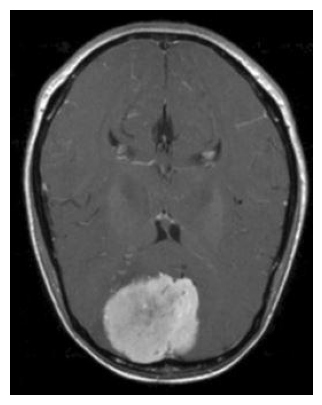

In [8]:
import matplotlib.pyplot as plt

src = "/kaggle/input/brain-tumor-detection/Br35H-Mask-RCNN/TEST/y709.jpg"
i = detection_model.predict(source=src, conf=0.5, save=True, line_width=2, show_labels=True)

im = plt.imread(src)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(im)
plt.show()

In [9]:
def convert(size,x,y,w,h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh
    box[0] = x-(w/2.0)
    box[1] = x+(w/2.0)
    box[2] = y-(h/2.0)
    box[3] = y+(h/2.0)
    return (box)
def plot_annotations(img, filename):
    with open(annotations_path+filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])

            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x,y,w,h)
            cv2.rectangle(img, (int(round(bb[0])),int(round(bb[2]))),(int(round(bb[1])),int(round(bb[3]))),(255,0,0),2)
            plt.axis('off')
            plt.imshow(img)

In [10]:
def annotated_image(file_path, images_path, image_number):
    image_path = images_path +'/'+ image_number
    with open(file_path, 'r') as file:
        json_data = json.load(file)
#         print(json_data)
    selected_element = json_data[image_number]
    if selected_element['regions'][0]:
      region = selected_element['regions'][0]
      shape_name = region['shape_attributes']['name']

      image = Image.open(image_path)
      fig, ax = plt.subplots()
      ax.imshow(image)

      if shape_name == 'polygon':
          x_coordinates = region['shape_attributes']['all_points_x']
          y_coordinates = region['shape_attributes']['all_points_y']
          polygon = Polygon(np.column_stack((x_coordinates, y_coordinates)), edgecolor='r', linewidth=2, facecolor='none')
          ax.add_patch(polygon)

      elif shape_name == 'ellipse':
          center_x = region['shape_attributes']['cx']
          center_y = region['shape_attributes']['cy']
          major_axis = region['shape_attributes']['rx']
          minor_axis = region['shape_attributes']['ry']
          ellipse = Ellipse((center_x, center_y), 2 * major_axis, 2 * minor_axis,
                            edgecolor='r', linewidth=2, facecolor='none')
          ax.add_patch(ellipse)
          ax.text(center_x, center_y, '.', color='r', fontsize=10, ha='center', va='center')

      elif shape_name == 'circle':
          center_x = region['shape_attributes']['cx']
          center_y = region['shape_attributes']['cy']
          radius = region['shape_attributes']['r']
          circle = Circle((center_x, center_y), radius, edgecolor='r', linewidth=2, facecolor='none')
          ax.add_patch(circle)
          ax.text(center_x, center_y, '.', color='r', fontsize=10, ha='center', va='center')

      ax.set_title(f'Annotation in {image_number}')
      plt.axis('off')
      plt.show()

    else:
        print("No annotation, but the image is: ")
        show_image(image_path)

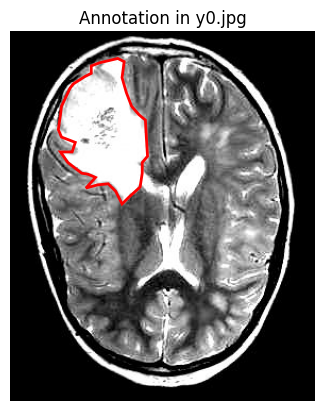

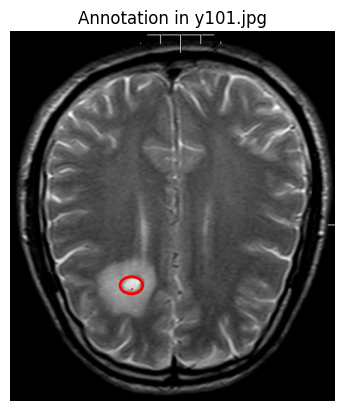

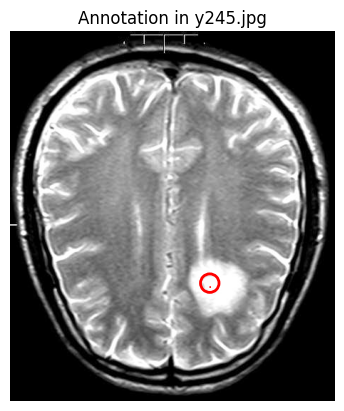

<Figure size 640x480 with 0 Axes>

In [11]:
import json 

# def annotated_image(file_path, image_path, image_number):
#     json_data = {}
#     with open(file_path, 'r') as file:
#         j = json.load(file)
# #         print(j)
#         for i in j:
#             # print(i)
#             json_data[i[:-len(str(j[i]['size']))]]=j[i]
#         print(str(json_data)[:1000])
#         if image_number in json_data:
#             selected_element = json_data[image_number]
#             if selected_element['regions']:
#                 region = selected_element['regions'][0]
#                 print("debug point 1 reached")
#                 # Process the region data
#             else:
#                 print(f"No regions found for image {image_number}")
#         else:
#             print(f"Image number {image_number} not found in annotations.")
#     with open("/kaggle/annotations_all_new.json", 'w+') as file:
#         json.dump(json_data, file, indent=4)


annotations_path = "/kaggle/input/data123/annotations_all.json"
images_path = "/kaggle/input/brain-tumor-detection/Br35H-Mask-RCNN/TRAIN"

image_numbers = ["y0.jpg", "y101.jpg", "y245.jpg"]

for image_number in image_numbers:
    with open(annotations_path, "r") as file:
#         print(json.load(file))
        annotated_image(annotations_path, images_path, image_number)
plt.tight_layout()
plt.show()


In [12]:
def create_bbox_json(input_json, output_json):
    with open(input_json, 'r') as f:
        data = json.load(f)
    try:
        os.mkdir("/kaggle/working/labels")
    except:
        pass
#     print(data)
    new_data = []

    for image_info in data:
        new_image_info = {'filename': image_info, 'boxes': []}
        element = data[image_info]

        image = "/kaggle/input/brain-tumor-detection/yes/" +  image_info
        img = cv2.imread(image)
        # print(type(img))
        # break
        if img is None:
            print(f"Failed to read image: {image}")
            continue
        height, width, channels = img.shape

        for region in element['regions']:
            box = {}
            shape_attributes = region['shape_attributes']
            region_attributes = region['region_attributes']
            box['class'] = '1'


            if 'all_points_x' in shape_attributes and 'all_points_y' in shape_attributes:
            # Obtener bounding box a partir de los puntos del polígono
                x_coords = shape_attributes['all_points_x']
                y_coords = shape_attributes['all_points_y']
                box['center_x'] = (min(x_coords) + max(x_coords)) / 2
                box['center_y'] = (min(y_coords) + max(y_coords)) / 2
                box['width'] = max(x_coords) - min(x_coords)
                box['height'] = max(y_coords) - min(y_coords)
            elif 'cx' in shape_attributes and 'cy' in shape_attributes and 'r' in shape_attributes:
                center_x = shape_attributes['cx']
                center_y = shape_attributes['cy']
                radius = shape_attributes['r']
                box['center_x'] = center_x
                box['center_y'] = center_y
                box['width'] = 2 * radius
                box['height'] = 2 * radius

            elif 'cx' in shape_attributes and 'cy' in shape_attributes and 'rx' in shape_attributes and 'ry' in shape_attributes:
                center_x = shape_attributes['cx']
                center_y = shape_attributes['cy']
                minor_radius = shape_attributes['ry']
                major_radius = shape_attributes['rx']
                box['center_x'] = center_x
                box['center_y'] = center_y
                box['width'] = 2 * major_radius
                box['height'] = 2 * minor_radius

          # Normalizar las coordenadas
            box['center_x'] = round(box['center_x'] / width, 6)
            box['center_y'] = round(box['center_y'] / height, 6)
            box['width'] = round(box['width'] / width, 6)
            box['height'] = round(box['height'] / height, 6)

            new_image_info['boxes'].append(box)

        new_data.append(new_image_info)

    # Crear el archivo de texto para cada imagen
        txt_filename = os.path.join("/kaggle/working/labels", os.path.splitext(image_info)[0] + '.txt')
        with open(txt_filename, 'w') as txt_file:
            for box in new_image_info['boxes']:
                txt_file.write(f"{box['class']} {box['center_x']} {box['center_y']} {box['width']} {box['height']}\n")

    with open(output_json, 'w+') as f:
        json.dump(new_data, f, indent=2)

create_bbox_json('/kaggle/input/data123/annotations_all.json', '/kaggle/working/bbox.json')



In [13]:
a = "/kaggle/working/labels/y101.txt"


with open(a,'r') as b:
  content = b.read()

  print(content)


1 0.372807 0.685934 0.070175 0.046243



In [14]:
def convert(size,x,y,w,h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh
    box[0] = x-(w/2.0)
    box[1] = x+(w/2.0)
    box[2] = y-(h/2.0)
    box[3] = y+(h/2.0)

    return (box)

def plot_annotations(img, filename):
    with open(annotations_path+filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])

            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x,y,w,h)
            cv2.rectangle(img, (int(round(bb[0].astype(np.uint8))),int(round(bb[2].astype(np.uint8)))),(int(round(bb[1].astype(np.uint8))),int(round(bb[3].astype(np.uint8)))),(255,0,0),2)
            plt.axis('off')
            plt.imshow(img)

In [15]:
import os
import cv2


# Directory containing the images
directory = "/kaggle/working/labels/"

# New dimensions
new_width = 300
new_height = 300

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):  # Check if the file is a .jpg file
        filepath = os.path.join(directory, filename)
        
        # Read the image
        img = cv2.imread(filepath)
        
        # Check if the image is not None and not empty
        if img is not None and img.size != 0:
            # Resize the image
            resized_img = cv2.resize(img, (new_width, new_height))
            
            # Save the resized image (if you want to save it)
            cv2.imwrite(filepath, resized_img)
        else:
            print(f"Error: Unable to read or empty image {filepath}")


y506.txt
y618.txt
y89.txt
y613.txt
y577.txt
y345.txt
y561.txt
y213.txt


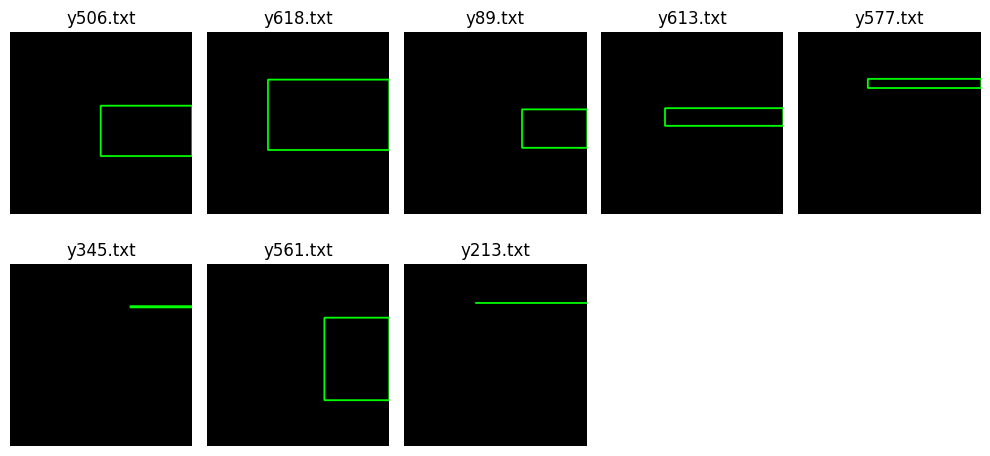

In [16]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Define the correct path to the annotations directory
annotations_path = "/kaggle/working/labels/"

# List of specific filenames
specific_files = ['y506.txt', 'y618.txt', 'y89.txt', 'y613.txt', 'y577.txt',
                  'y345.txt', 'y561.txt', 'y213.txt']

plt.figure(figsize=(10,5))
c = 1

for i in specific_files:
    print(i)
    
    # Read the text file containing image data
    with open(os.path.join(annotations_path, i), 'r') as file:
        lines = file.readlines()
    
    # Convert the lines to floats
    img_data = [float(x) for line in lines for x in line.split()]
    
    # Convert the list to a numpy array
    img_array = np.array(img_data)
    
    # Check if the array size is correct
    if img_array.size == 5:
        # Create a blank image
        img = np.zeros((300, 300, 3), dtype=np.uint8)
        
        # Draw a bounding box on the image
        x1, y1, x2, y2, _ = img_array
        x1, y1, x2, y2 = int(x1 * 300), int(y1 * 300), int(x2 * 300), int(y2 * 300)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Convert to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(2, 5, c)
        plt.imshow(img)
        plt.title(i)  # Set the title as the filename
        plt.axis('off')  # Turn off axis
        c += 1
    else:
        print(f"Error: Incorrect data format in {i}")

plt.tight_layout()
plt.show()


In [17]:
import os

# Define the correct path to the annotations directory
annotations_path = "/kaggle/working/labels/"

# List the files in the annotations directory
ls = os.listdir(annotations_path)

print("Files in the 'labels' directory:")
for filename in ls:
    print(filename)


Files in the 'labels' directory:
y645.txt
y126.txt
y111.txt
y789.txt
y637.txt
y474.txt
y368.txt
y555.txt
y32.txt
y176.txt
y523.txt
y507.txt
y95.txt
y729.txt
y763.txt
y256.txt
y798.txt
y443.txt
y685.txt
y541.txt
y427.txt
y41.txt
y287.txt
y271.txt
y783.txt
y333.txt
y380.txt
y569.txt
y700.txt
y53.txt
y25.txt
y130.txt
y207.txt
y566.txt
y342.txt
y709.txt
y581.txt
y389.txt
y456.txt
y106.txt
y90.txt
y475.txt
y491.txt
y239.txt
y55.txt
y366.txt
y367.txt
y693.txt
y245.txt
y390.txt
y410.txt
y396.txt
y608.txt
y635.txt
y39.txt
y85.txt
y599.txt
y563.txt
y364.txt
y158.txt
y328.txt
y241.txt
y735.txt
y231.txt
y503.txt
y679.txt
y139.txt
y223.txt
y603.txt
y165.txt
y205.txt
y145.txt
y464.txt
y509.txt
y370.txt
y63.txt
y192.txt
y68.txt
y652.txt
y483.txt
y611.txt
y9.txt
y104.txt
y510.txt
y114.txt
y508.txt
y660.txt
y18.txt
y737.txt
y15.txt
y440.txt
y173.txt
y1.txt
y756.txt
y329.txt
y202.txt
y45.txt
y322.txt
y355.txt
y593.txt
y528.txt
y350.txt
y360.txt
y543.txt
y103.txt
y242.txt
y172.txt
y632.txt
y272.txt
y78.

y506.txt
y618.txt
y89.txt
y613.txt
y577.txt
y345.txt
y561.txt
y213.txt
y168.txt
y700.txt


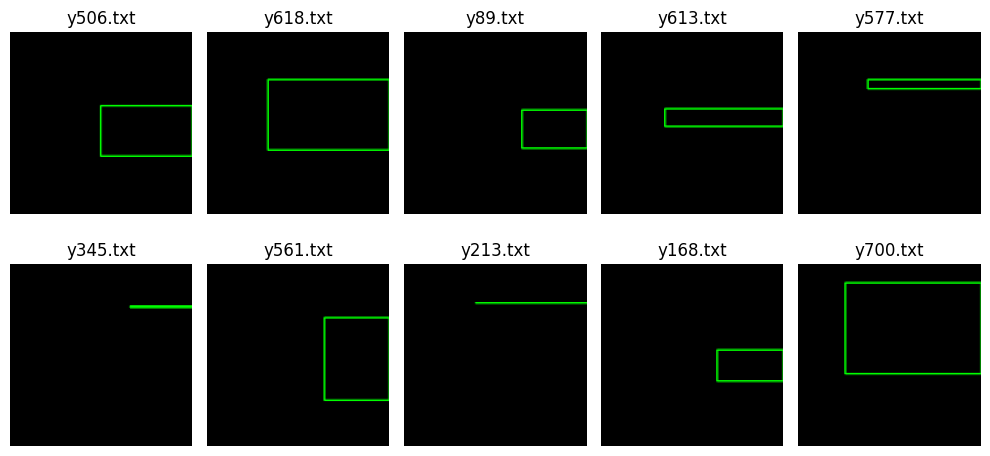

In [18]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Define the correct path to the annotations directory
annotations_path = "/kaggle/working/labels/"

# List of specific filenames
specific_files = ['y506.txt', 'y618.txt', 'y89.txt', 'y613.txt', 'y577.txt',
                  'y345.txt', 'y561.txt', 'y213.txt', 'y168.txt', 'y700.txt']

plt.figure(figsize=(10,5))
c = 1

for i in specific_files:
    print(i)
    
    # Read the text file containing image data
    with open(os.path.join(annotations_path, i), 'r') as file:
        lines = file.readlines()
    
    # Convert the lines to floats
    img_data = [float(x) for line in lines for x in line.split()]
    
    # Convert the list to a numpy array
    img_array = np.array(img_data)
    
    # Check if the array size is correct
    if img_array.size == 5:
        # Assuming the data is in the format [x1, y1, x2, y2, class]
        # Create a blank image
        img = np.zeros((300, 300, 3), dtype=np.uint8)
        
        # Draw a bounding box on the image
        x1, y1, x2, y2, _ = img_array
        cv2.rectangle(img, (int(x1 * 300), int(y1 * 300)), (int(x2 * 300), int(y2 * 300)), (0, 255, 0), 2)
        
        # Resize the image to 150x150 pixels
        img = cv2.resize(img, (150, 150))
        
        # Convert to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(2, 5, c)
        plt.imshow(img)
        plt.title(i)  # Set the title as the filename
        plt.axis('off')  # Turn off axis
        c += 1
    else:
        print(f"Error: Incorrect data format in {i}")

plt.tight_layout()
plt.show()


y402.jpg
y402.txt
y371.jpg
y371.txt
y81.jpg
y81.txt
y486.jpg
y486.txt
y130.jpg
y130.txt
y405.jpg
y405.txt
y94.jpg
y94.txt
y288.jpg
y288.txt
y75.jpg
y75.txt
y122.jpg
y122.txt


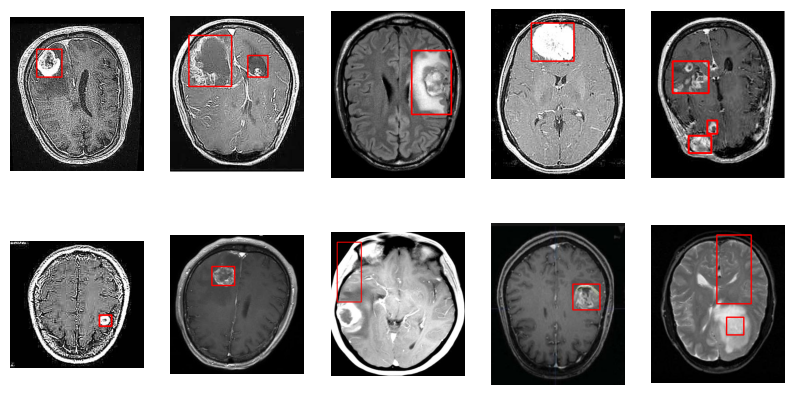

In [19]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

annotations_path = "/kaggle/working/labels/"
plt.figure(figsize=(10,5))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):

  print(i)
  img = np.array(plt.imread(images_path+'/'+i))
  i = i.rstrip('.jpg') + '.txt'
  print (i)
  plt.subplot(2,5, c)
  plot_annotations(img, i)
  c+=1

In [20]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Define the correct path to the annotations directory
annotations_path = "/kaggle/working/labels/"

# List of specific filenames
specific_files = ['y506.txt', 'y618.txt', 'y89.txt', 'y613.txt', 'y577.txt',
                  'y345.txt', 'y561.txt', 'y213.txt', 'y592.txt', 'y567.txt']

plt.figure(figsize=(10,5))
c = 1

for i in specific_files:
    print(i)
    
    # Read the text file containing image data
    with open(os.path.join(annotations_path, i), 'r') as file:
        lines = file.readlines()
    
    # Convert the lines to floats
    img_data = [float(x) for line in lines for x in line.split()]
    
    # Convert the list to a numpy array
    img_array = np.array(img_data)
    
    # Reshape the array to image dimensions
    img = img_array.reshape((300, 300, 3))
    
    # Convert to RGB
    img = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 5, c)
    plt.imshow(img)
    plt.title(i)  # Set the title as the filename
    plt.axis('off')  # Turn off axis
    c += 1

plt.tight_layout()
plt.show()


y506.txt


ValueError: cannot reshape array of size 5 into shape (300,300,3)

<Figure size 1000x500 with 0 Axes>

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

annotations_path = "/kaggle/working/labels/"
images_path = "/kaggle/working/labels/"  # Update this path to the correct directory
plt.figure(figsize=(10,5))
specific_files = ['y506.txt', 'y618.txt', 'y89.txt', 'y613.txt', 'y577.txt',
                  'y345.txt', 'y561.txt', 'y213.txt', 'y592.txt', 'y567.txt']

c = 1
for i in specific_files:
    print(i)
    img_path = os.path.join(images_path, i.rstrip('.txt') + '.jpg')
    print(img_path)
    
    # Check if the file exists
    if os.path.exists(img_path):
        img = np.array(plt.imread(img_path))
        plt.subplot(2, 5, c)
        # Assuming plot_annotations is a function you've defined elsewhere
        # plot_annotations(img, i)
        c += 1
    else:
        print(f"File {img_path} not found.")

plt.show()


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

annotations_path = "/kaggle/working/labels/"
plt.figure(figsize=(10,5))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):

  print(i)
  img = np.array(plt.imread(images_path+'/'+i))
  i = i.rstrip('.jpg') + '.txt'
  print (i)
  plt.subplot(2,5, c)
  plot_annotations(img, i)
  c+=1


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

annotations_path = "/kaggle/working/labels/"

plt.figure(figsize=(10,5))
ls = os.listdir(annotations_path)
c = 1
target_height = 300  # Specify your desired height
target_width = 300   # Specify your desired width

# Filter out only the .jpg files
jpg_files = [f for f in ls if f.lower().endswith('.jpg')]

# Check if there are enough .jpg files to sample from
if len(jpg_files) < 10:
    print(f"Warning: Only {len(jpg_files)} .jpg files available, sampling {len(jpg_files)} instead of 10.")

for i in random.sample(jpg_files, min(10, len(jpg_files))):  # Sample min(10, len(jpg_files)) items
    print(i)
    img_path = os.path.join(annotations_path, i)
    
    # Read the image
    img = cv2.imread(img_path)
    
    # Check if the image is not None and not empty
    if img is not None and img.size != 0:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, (target_width, target_height))  # Resize image
        plt.subplot(2,5, c)
        plt.imshow(img)  # Display image
        plt.title(i)
        plt.axis('off')
        c += 1
    else:
        print(f"Error: Unable to read or empty image {img_path}")

plt.tight_layout()
plt.show()


In [ ]:
def show_image(num):
    images_path = "/kaggle/input/brain-tumor-detection/yes/"
    img = images_path + "y" + str(num) + ".jpg"
    i = "y" + str(num) + ".jpg"
    note = "y" + str(num)+ ".txt"

    img = np.array(plt.imread(images_path+i))
    i = i.rstrip('.jpg') + '.txt'

    plot_annotations(img, note)

In [ ]:
show_image(130)

In [ ]:
# Define paths
train_path = '/kaggle/working/TRAIN/'
test_path = '/kaggle/working/TEST/'
images_path = "/kaggle/input/brain-tumor-detection/yes/"
annotations_path = "/kaggle/working/labels/"

# Create directories if they don't exist
os.makedirs(train_path + 'images', exist_ok=True)
os.makedirs(train_path + 'labels', exist_ok=True)
os.makedirs(test_path + 'images', exist_ok=True)
os.makedirs(test_path + 'labels', exist_ok=True)

print('Copying Train Data..!!')
for i in range(0, 500):
    shutil.copyfile(images_path + 'y' + str(i) + '.jpg', train_path + 'images/y' + str(i) + '.jpg')
    shutil.copyfile(annotations_path + 'y' + str(i) + '.txt', train_path + 'labels/y' + str(i) + '.txt')

print('Copying Test Data..!!')
for i in range(701, 801):
    shutil.copyfile(images_path + 'y' + str(i) + '.jpg', test_path + 'images/y' + str(i) + '.jpg')
    shutil.copyfile(annotations_path + 'y' + str(i) + '.txt', test_path + 'labels/y' + str(i) + '.txt')

In [ ]:
text= """
train: /kaggle/working/TRAIN
val: /kaggle/working/TEST

#number of class
nc: 2

# class names
names: ['not' , tumor']
"""
with open("data.yaml", 'w') as file:
     file.write(text)
    
 

In [ ]:
import torch.nn as nn
import typing as tp

def get_activation(activ_name: str="relu"):
    """"""
    act_dict = {
        "relu": nn.ReLU(inplace=True),
        "tanh": nn.Tanh(),
        "sigmoid": nn.Sigmoid(),
        "identity": nn.Identity()}
    if activ_name in act_dict:
        return act_dict[activ_name]
    else:
        raise NotImplementedError
        

class Conv2dBNActiv(nn.Module):
    """Conv2d -> (BN ->) -> Activation"""
    
    def __init__(
        self, in_channels: int, out_channels: int,
        kernel_size: int, stride: int=1, padding: int=0,
        bias: bool=False, use_bn: bool=True, activ: str="relu"
    ):
        """"""
        super(Conv2dBNActiv, self).__init__()
        layers = []
        layers.append(nn.Conv2d(
            in_channels, out_channels,
            kernel_size, stride, padding, bias=bias))
        if use_bn:
            layers.append(nn.BatchNorm2d(out_channels))
            
        layers.append(get_activation(activ))
        self.layers = nn.Sequential(*layers)
        
    def forward(self, x):
        """Forward"""
        return self.layers(x)
        

class SSEBlock(nn.Module):
    """channel `S`queeze and `s`patial `E`xcitation Block."""

    def __init__(self, in_channels: int):
        """Initialize."""
        super(SSEBlock, self).__init__()
        self.channel_squeeze = nn.Conv2d(
            in_channels=in_channels, out_channels=1,
            kernel_size=1, stride=1, padding=0, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """Forward."""
        # # x: (bs, ch, h, w) => h: (bs, 1, h, w)
        h = self.sigmoid(self.channel_squeeze(x))
        # # x, h => return: (bs, ch, h, w)
        return x * h
    
    
class SpatialAttentionBlock(nn.Module):
    """Spatial Attention for (C, H, W) feature maps"""
    
    def __init__(
        self, in_channels: int,
        out_channels_list: tp.List[int],
    ):
        """Initialize"""
        super(SpatialAttentionBlock, self).__init__()
        self.n_layers = len(out_channels_list)
        channels_list = [in_channels] + out_channels_list
        assert self.n_layers > 0
        assert channels_list[-1] == 1
        
        for i in range(self.n_layers - 1):
            in_chs, out_chs = channels_list[i: i + 2]
            layer = Conv2dBNActiv(in_chs, out_chs, 3, 1, 1, activ="relu")
            setattr(self, f"conv{i + 1}", layer)
            
        in_chs, out_chs = channels_list[-2:]
        layer = Conv2dBNActiv(in_chs, out_chs, 3, 1, 1, activ="sigmoid")
        setattr(self, f"conv{self.n_layers}", layer)
    
    def forward(self, x):
        """Forward"""
        h = x
        for i in range(self.n_layers):
            h = getattr(self, f"conv{i + 1}")(h)
            
        h = h * x
        return h

In [ ]:
class SpatialAttention(nn.Module):
    def __init__(self, in_channels):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Compute attention weights
        attention_scores = self.conv(x)
        attention_weights = self.sigmoid(attention_scores)

        # Apply attention to the input feature map
        attended_features = x * attention_weights

        return attended_features


class SiameseResNet(nn.Module):
    def __init__(self, model_name='resnet18', pretrained=False):
        super(SiameseResNet, self).__init__()
        self.baseModel = models.resnet18(pretrained=pretrained)

        # Experiment with different spatial sizes based on the image resolution and signature complexity
        self.attention1 = SpatialAttention(in_channels=64)  # Spatial attention for layer 1
        self.attention2 = SpatialAttention(in_channels=128)  # Spatial attention for layer 2

        self.baseModel.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.baseModel.fc = nn.Identity()

    def forward(self, x):
        out = self.baseModel.conv1(x)
        out = self.baseModel.bn1(out)
        out = self.baseModel.relu(out)
        out = self.baseModel.maxpool(out)

        out = self.attention1(self.baseModel.layer1(out))  # Applying spatial attention to layer 1
        out = self.attention2(self.baseModel.layer2(out))  # Applying spatial attention to layer 2
        out = self.baseModel.layer3(out)  # No attention for layer 3
        out = self.baseModel.layer4(out)  # No attention for layer 4

        out = self.baseModel.avgpool(out)
        out = torch.flatten(out, 1)
        return out

In [ ]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_anchor_positive = F.pairwise_distance(anchor, positive, p=2)
        distance_anchor_negative = F.pairwise_distance(anchor, negative, p=2)
        loss = torch.clamp(distance_anchor_positive - distance_anchor_negative + self.margin, min=0.0)
        return loss.mean()

In [ ]:
def train_model(model, loader, n_epochs, optimizer, loss_fn):
    history = {'train_loss': []}
    print("------------------------Training--------------------------")
    for epoch in range(1, n_epochs + 1):
        t0 = datetime.now()
        print(f"Beginning Epoch {epoch}/{n_epochs}...")
        train_loss = []
        model.train()
        for i, data in tqdm(enumerate(loader, 0)):
            anchor, positive, negative = data
            anchor = anchor.to(device=device)
            positive = positive.to(device=device)
            negative = negative.to(device=device)
            
            optimizer.zero_grad()
            anchor_embeddings = model(anchor)  
            positive_embeddings = model(positive)  
            negative_embeddings = model(negative) 

            loss = loss_fn(anchor_embeddings, positive_embeddings, negative_embeddings)  # Changed `triplet_loss` to `loss_fn`
            
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())  # Added the loss value to `train_loss` list

        dt = datetime.now() - t0
        print('\nEpoch: {}\tTrain Loss: {}\tDuration: {}'.format(epoch, np.mean(train_loss), dt))

        # Tracking accuracy and loss in each epoch for plot
        history['train_loss'].append(np.mean(train_loss))
    
    return history

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# Assuming SiameseResNet, TripletLoss, and SpatialAttention are defined elsewhere in your code

margin = 0.1

# Create an instance of SiameseResnet with the ResNet model and embedding size
siamese_model = SiameseResNet()
siamese_model = nn.DataParallel(siamese_model).to(device)

triplet_loss = TripletLoss(margin).to(device)
optimizer = optim.Adam(siamese_model.parameters(), lr=0.001)  # Use optim from torch.optim


In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary

model = SiameseResNet()
model = nn.DataParallel(model).to(device)
summary(model, (1,200,300))

In [ ]:
print(siamese_model)

In [ ]:
model = YOLO("yolov8m.pt")
model.train(data='data.yaml', epochs=10)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/kaggle/working/runs/detect/train2/results.csv")


df.columns = df.columns.str.strip()


df = df[['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss']]


for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].fillna((df[column].shift() + df[column].shift(-1)) / 2)


plt.figure(figsize=(12, 4.8))


plt.subplot(1, 3, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Training')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation')
plt.title('Evolution of box_loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.legend()
plt.grid(True)


plt.subplot(1, 3, 2)
plt.plot(df['epoch'], df['train/cls_loss'], label='Training')
plt.plot(df['epoch'], df['val/cls_loss'], label='Validation')
plt.title('Evolution of cls_loss')
plt.xlabel('Epoch')
plt.ylabel('Cls Loss')
plt.legend()
plt.grid(True)


plt.subplot(1, 3, 3)
plt.plot(df['epoch'], df['train/dfl_loss'], label='Training')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Validation')
plt.title('Evolution of dfl_loss')
plt.xlabel('Epoch')
plt.ylabel('Dfl Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
model_path = 'runs/detect/train2/'

def plot(ls, size, lcolor = 'blue'):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1], c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
metrics = [
    tf.keras.metrics.TruePositives(name='tp'),tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),tf.keras.metrics.FalseNegatives(name='fn'), 
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.AUC(name='prc', curve='PR'),
]

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3,3), activation="relu", input_shape=(224,224,3)),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3)),
      tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3)),
      tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units = 512 , activation="relu"),
      tf.keras.layers.Dropout(rate = 0.5),
      tf.keras.layers.Dense(units = 1 , activation="sigmoid")
  ])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.0008),
                loss = "binary_crossentropy",
                metrics=metrics)

tf.keras.utils.plot_model(model) # image of models structure you can get from output folder
model.summary()

In [ ]:
import os
import pathlib

data_path = pathlib.Path("/kaggle/input/brain-tumor-detection/Br35H-Mask-RCNN/TEST")
data_path = os.path.join(data_path, os.listdir(data_path)[2])

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pathlib

data_path = pathlib.Path("/kaggle/input/brain-tumor-detection/Br35H-Mask-RCNN/TEST")
data_path = os.path.join(data_path, os.listdir(data_path)[2])

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=10,
                                  width_shift_range=0.05,
                                  height_shift_range=0.05,
                                  zoom_range=0.05,
                                  horizontal_flip=True, 
                                  vertical_flip=True,
                                  brightness_range=[0.5, 1.4],
                                  validation_split=0.2)

train_generator = train_datagen.flow_from_directory(directory=data_path,
                                                    batch_size=10,
                                                    target_size=(224, 224),
                                                    shuffle=True,
                                                    class_mode="binary",
                                                    subset="training")

validation_generator = train_datagen.flow_from_directory(directory=data_path,
                                                         batch_size=10,
                                                         target_size=(224, 224),
                                                         shuffle=False,
                                                         class_mode="binary",
                                                         subset="validation")


In [ ]:
history1 = model.fit(train_generator,epochs = 20, validation_data = validation_generator, class_weight=train_class_weights)

In [ ]:
import random
import os
images_path = "/kaggle/input/brain-tumor-detection/yes/"
img = random.sample(os.listdir(images_path), 1)
img = img[0]
print(img)

i=model.predict(source=images_path+img, conf=0.55, iou = 0.75, save=True, line_width=2)

from PIL import Image
result = i[0]

print("\n")

box_ = result.boxes

for box in box_:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

im = plt.imread('/kaggle/input/brain-tumor-detection/yes/'+img)
plt.axis('off')
plt.imshow(im)

In [ ]:
src = "/kaggle/input/brain-tumor-detection/no/No12.jpg"
i=model.predict(source=src, conf=0.4, save=True, line_width=2)


im = plt.imread('/kaggle/working/runs/'+img)
plt.axis('off')
plt.imshow(im)

In [ ]:
def compute_results(model,
                    dataloader,
                    treshold=0.33):

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    results = {"Id": [],"image": [], "GT": [],"Prediction": []}

    with torch.no_grad():
        for i, data in enumerate(dataloader):
            id_, imgs, targets = data['Id'], data['image'], data['mask']
            imgs, targets = imgs.to(device), targets.to(device)
            logits = model(imgs)
            probs = torch.sigmoid(logits)
            
            predictions = (probs >= treshold).float()
            predictions =  predictions.cpu()
            targets = targets.cpu()
            
            results["Id"].append(id_)
            results["image"].append(imgs.cpu())
            results["GT"].append(targets)
            results["Prediction"].append(predictions)
            
            # only 5 pars
            if (i > 5):
                return results
        return results

In [ ]:
# prediction time starts(p0) 
p0 = time.time()

In [ ]:
nodel = UNet3d(in_channels=4, n_classes=3, n_channels=24).to('cuda')

In [ ]:
results = compute_results( nodel, val_dataloader, 0.33)